# Example to show

In [1]:
import pandas as pd

df = pd.read_csv('meta.csv')

In [2]:
# Filter rows where the task is 'TextClassification'
filtered = df[df['task'] == 'TextClassification']

# Get the unique model names under this task
models = filtered['model'].unique()

print("Models with task = 'TextClassification':")
print(models)

# (Optional) print how many models there are
print(f"\nTotal number of TextClassification models: {len(models)}")

Models with task = 'TextClassification':
['DEEPSEEK' 'LLAMA' 'MISTRAL' 'BARTBASE' 'BARTLARGE' 'BERTBASE'
 'BERTLARGE' 'DISTILBERT']

Total number of TextClassification models: 8


In [3]:
import re
import pandas as pd

# ==== Power-related Metrics Description Text ====
power_text = """
Turbostat:PkgWatt.*.*[W] — Package-level power consumption (watts). (sampled)
Turbostat:RAMWatt.*.*[W] — RAM subsystem power (watts). (sampled)
GPU: power.draw.*.*[W] — GPU power draw (watts) for the sampling period (sampled).
GPU: power.draw.average.*.*[W] — Average power draw (watts). (sampled/aggregate)
GPU: power.draw.instant.*.*[W] — Instantaneous power draw reading (watts). (instant)
"""

# ==== Extract Metrics and Descriptions ====
power_metrics = re.findall(r"^([A-Za-z0-9_:.*\[\]]+)\s+—\s+(.*)$", power_text, flags=re.M)
df_metrics = pd.DataFrame(power_metrics, columns=["metric_pattern", "description"])


In [4]:
# ==== Only focus on 'TextClassification' mode and 'infer' phase ====
for file in df[(df['task'] == 'TextClassification') & (df['phase'] == 'infer')]['source_file'].tolist():
    print(f"Reading: {file}")
    data = pd.read_csv(file, sep='\t', header=0)

    # ==== Find matching columns based on the memory patterns ====
    matched_cols = []
    for pattern in df_metrics["metric_pattern"]:
        # Replace .* in the regular expression with the actual regular expression matching pattern
        regex = pattern.replace(".*", ".*")
        matched = [col for col in data.columns if re.match(regex, col)]
        matched_cols.extend(matched)

    # Deduplication and sorting
    matched_cols = list(sorted(set(matched_cols)))

    print(f"Matched {len(matched_cols)} columns:")
    print(matched_cols)

    # ==== Extract data from these columns ====
    data_selected = data[matched_cols]

    # ==== Optional: Merge description information (matching by regular expression pattern) ====
    # Create a mapping for metric_name -> description (using the first matching rule)
    desc_map = {}
    for _, row in df_metrics.iterrows():
        regex = row['metric_pattern'].replace(".*", ".*")
        for col in matched_cols:
            if re.match(regex, col):
                desc_map[col] = row['description']

    desc_df = pd.DataFrame(list(desc_map.items()), columns=["metric_name", "description"])

    # display(desc_df.head())
    display(data_selected.head())

    break

Reading: ./infer_separated/data_DEEPSEEKforInference_default_2025-04-26T09-41-59_htc-g003.txt
Matched 6 columns:
['Turbostat:PkgWatt.-.htc-g003[W]', 'Turbostat:PkgWatt.0.htc-g003[W]', 'Turbostat:PkgWatt.24.htc-g003[W]', 'Turbostat:RAMWatt.-.htc-g003[W]', 'Turbostat:RAMWatt.0.htc-g003[W]', 'Turbostat:RAMWatt.24.htc-g003[W]']


Turbostat:PkgWatt.-.htc-g003[W]  Turbostat:PkgWatt.0.htc-g003[W]  \
0                           164.72                           87.840   
1                           163.26                           87.720   
2                           167.75                           89.220   
3                           165.91                           88.365   
4                           162.19                           86.480   

   Turbostat:PkgWatt.24.htc-g003[W]  Turbostat:RAMWatt.-.htc-g003[W]  \
0                            76.880                           101.62   
1                            75.550                           101.34   
2                            78.530                           101.55   
3                            77.545                           101.43   
4                            75.710                            99.98   

   Turbostat:RAMWatt.0.htc-g003[W]  Turbostat:RAMWatt.24.htc-g003[W]  
0                           54.750                            46.870  
1                           54.620                            46.720  
2                           54.350                            47.210  
3                           54.815                            46.605  
4                           53.810                            46.170

# Real code to plot power consumption of various models on the same task

Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-26T09-41-59_htc-g003.txt
Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-26T17-25-16_htc-g003.txt
Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-27T01-02-52_htc-g003.txt


/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)


Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-27T08-42-53_htc-g003.txt
Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-27T16-03-52_htc-g003.txt
Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-27T23-33-04_htc-g003.txt
Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-28T06-57-11_htc-g003.txt


/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)


Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-28T14-23-34_htc-g003.txt
Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-28T21-53-34_htc-g003.txt
Reading file for model 'DEEPSEEK': ./infer_separated/data_DEEPSEEKforInference_default_2025-04-29T05-24-53_htc-g003.txt


/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)


Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-26T09-09-37_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-26T16-45-42_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-27T00-22-53_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-27T08-09-25_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-27T15-31-14_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-27T22-58-54_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-28T06-23-10_htc-g003.txt


/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)


Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-28T13-51-31_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-28T21-18-38_htc-g003.txt
Reading file for model 'LLAMA': ./infer_separated/data_LLAMAforInference_default_2025-04-29T04-46-54_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-26T08-32-44_htc-g003.txt


/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)


Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-26T16-10-06_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-26T23-45-58_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-27T07-33-50_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-27T14-56-09_htc-g003.txt


/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)
/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)


Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-27T22-20-31_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-28T05-49-11_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-28T13-17-30_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-28T20-43-02_htc-g003.txt
Reading file for model 'MISTRAL': ./infer_separated/data_MISTRALforInference_default_2025-04-29T04-11-47_htc-g003.txt
Reading file for model 'BARTBASE': ./infer_separated/infer_BARTBASEforTextClassification_default_2025-04-26T06-12-19_htc-g003.txt
Reading file for model 'BARTBASE': ./infer_separated/infer_BARTBASEforTextClassification_default_2025-04-26T13-44-48_htc-g003.txt
Reading file for model 'BARTBASE': ./infer_separated/infer_BARTBASEforTextClassification_default_2025-04-26T21-27-48_htc-g003.txt
Reading file for mod

/var/folders/nf/q3c0km1j4n5d342f34hf3g080000gn/T/ipykernel_33510/1732854440.py:150: RuntimeWarning: Mean of empty slice
  arr1 = np.nanmean(mat1, axis=0)


Reading file for model 'BARTBASE': ./infer_separated/infer_BARTBASEforTextClassification_default_2025-04-28T10-54-54_htc-g003.txt
Reading file for model 'BARTBASE': ./infer_separated/infer_BARTBASEforTextClassification_default_2025-04-28T18-23-25_htc-g003.txt
Reading file for model 'BARTBASE': ./infer_separated/infer_BARTBASEforTextClassification_default_2025-04-29T01-54-47_htc-g003.txt
Reading file for model 'BARTLARGE': ./infer_separated/infer_BARTLARGEforTextClassification_default_2025-04-26T06-29-02_htc-g003.txt
Reading file for model 'BARTLARGE': ./infer_separated/infer_BARTLARGEforTextClassification_default_2025-04-26T14-01-41_htc-g003.txt
Reading file for model 'BARTLARGE': ./infer_separated/infer_BARTLARGEforTextClassification_default_2025-04-26T21-44-00_htc-g003.txt
Reading file for model 'BARTLARGE': ./infer_separated/infer_BARTLARGEforTextClassification_default_2025-04-27T05-35-56_htc-g003.txt
Reading file for model 'BARTLARGE': ./infer_separated/infer_BARTLARGEforTextClassi

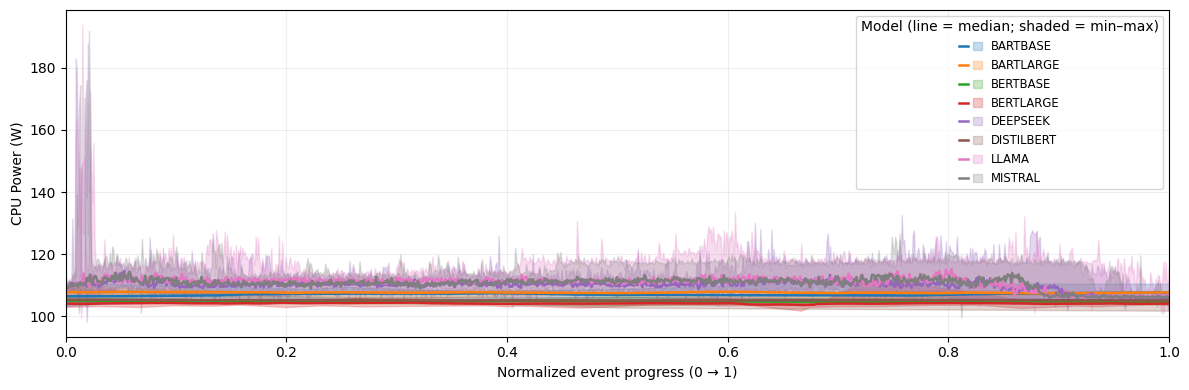

  Saved plot for 'Turbostat:RAMWatt.*.*[W]' -> power_plots/Turbostat_RAMWatt._.__W_.png


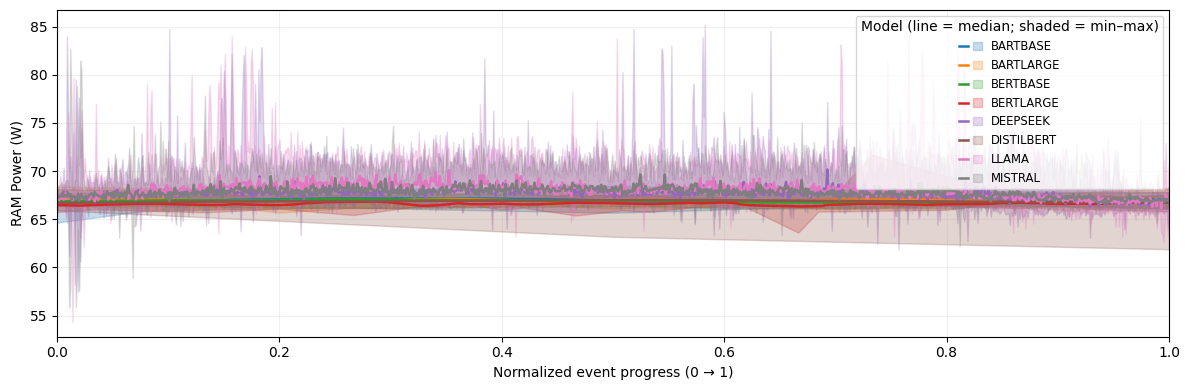

  Saved plot for 'GPU: power.draw.*.*[W]' -> power_plots/GPU__power.draw._.__W_.png


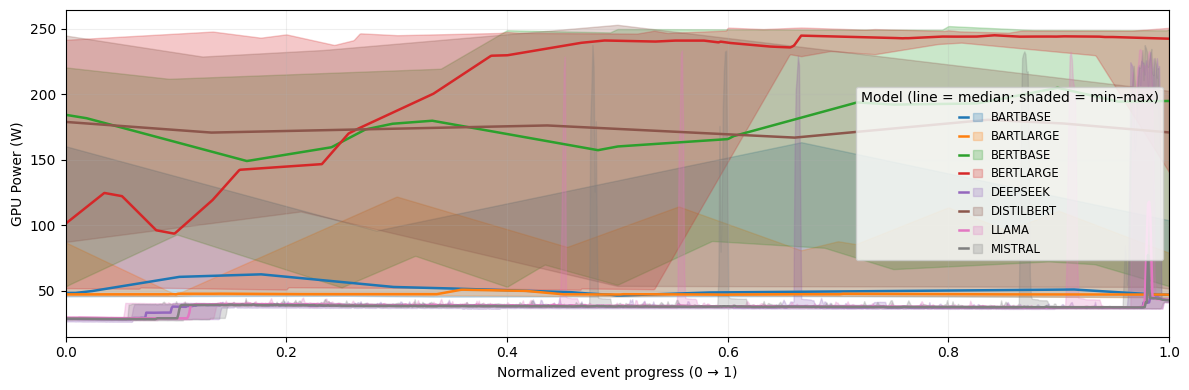

In [12]:
#!/usr/bin/env python3
"""
Plot aggregated power metrics per model.

- Reads meta.csv (expects columns: 'task', 'phase', 'source_file', 'model').
- Filters TextClassification + infer.
- Matches power metrics (turbostat + GPU).
- For GPU: sums device 1 and device 2 (power.draw.1 + power.draw.2) per sample.
- Interpolates each event to a common normalized grid (0..1) and aggregates per-model (min/max/median).
- Plots median line + shaded min-max for each model, with combined legend handles.
"""

import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# --------------------------
# Configuration / Assumptions
# --------------------------
# - meta.csv has columns: 'task', 'phase', 'source_file', 'model'
# - Each source_file is a tab-separated CSV with a time-like axis or at least index
# - The script will try to detect a timestamp/time column; if none found it will use row index
# - Interpolation grid points (per event)
INTERP_POINTS = 1000
OUTPUT_DIR = "power_plots"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==== Power-related Metrics Description Text ====
power_text = """
Turbostat:PkgWatt.*.*[W] — Package-level power consumption (watts). (sampled)
Turbostat:RAMWatt.*.*[W] — RAM subsystem power (watts). (sampled)
GPU: power.draw.*.*[W] — GPU power draw (watts) for the sampling period (sampled).
"""

# ==== Read meta.csv ====
df = pd.read_csv("meta.csv")

# Keep only TextClassification + infer
meta_filtered = df[(df['task'] == 'TextClassification') & (df['phase'] == 'infer')].copy()
if meta_filtered.empty:
    raise SystemExit("No rows found where task=='TextClassification' and phase=='infer' in meta.csv")

# ==== Extract metrics and descriptions from the power_text ====
power_metrics = re.findall(r"^([A-Za-z0-9_:.\*\[\] ]+)\s+—\s+(.*)$", power_text, flags=re.M)
df_metrics = pd.DataFrame(power_metrics, columns=["metric_pattern", "description"])

# helper: find time-like column in a dataframe
def detect_time_column(df):
    candidates = ['timestamp', 'time', 'ts', 'time_ms', 'datetime', 't']
    for c in candidates:
        if c in df.columns:
            return c
    # detect datetime-like dtype
    for c in df.columns:
        if np.issubdtype(df[c].dtype, np.datetime64):
            return c
    # fallback: None
    return None

# helper: get matched columns for a single metric pattern within a dataframe's columns
def get_matched_columns(metric_pattern, columns):
    """
    Interpret metric_pattern as a regex-like string (containing '.*' placeholders).
    Use re.search to find matching columns.
    """
    regex = metric_pattern.strip()
    # allow flexible whitespace
    regex = regex.replace(" ", r"\s*")
    # Use re.IGNORECASE? not necessary by default, but could be enabled if needed
    matched = [col for col in columns if re.search(regex, col)]
    return matched

# Build a structure: metrics -> model -> list of interpolated series (on 0..1 grid)
common_grid = np.linspace(0.0, 1.0, INTERP_POINTS)
metric_model_series = {}  # {metric_pattern: {model: [array([...]), ...] } }

for _, metric_row in df_metrics.iterrows():
    metric_pattern = metric_row['metric_pattern']
    metric_model_series[metric_pattern] = defaultdict(list)

# Iterate over event files and collect series
for idx, row in meta_filtered.iterrows():
    source_file = row['source_file']
    model_name = row.get('model', f"model_{idx}")
    print(f"Reading file for model '{model_name}': {source_file}")
    if not os.path.exists(source_file):
        print(f"  WARNING: file not found: {source_file}  -- skipping")
        continue

    try:
        data = pd.read_csv(source_file, sep='\t', header=0)
    except Exception as e:
        print(f"  ERROR reading {source_file}: {e}  -- skipping")
        continue

    # find time-like column (optional)
    time_col = detect_time_column(data)
    if time_col is not None:
        x_vals = data[time_col].values
        # If datetime, convert to numeric seconds from start
        if np.issubdtype(data[time_col].dtype, np.datetime64):
            x_vals = (pd.to_datetime(data[time_col]) - pd.to_datetime(data[time_col]).iloc[0]).dt.total_seconds().values
        else:
            # try numeric cast; if fails, use index
            try:
                x_vals = x_vals.astype(float)
            except Exception:
                x_vals = np.arange(len(data))
    else:
        # fallback: use row index
        x_vals = np.arange(len(data))

    # normalize x to 0..1 (fraction of event)
    if len(x_vals) <= 1:
        x_norm = np.linspace(0.0, 1.0, len(x_vals))
    else:
        x_min, x_max = float(np.min(x_vals)), float(np.max(x_vals))
        if x_max == x_min:
            x_norm = np.linspace(0.0, 1.0, len(x_vals))
        else:
            x_norm = (x_vals - x_min) / (x_max - x_min)

    # For each power metric, find matching columns and interpolate
    for _, metric_row in df_metrics.iterrows():
        metric_pattern = metric_row['metric_pattern']

        # --- Special handling for GPU sum of device 1 + 2 ---
        if re.search(r'GPU:.*power\.draw', metric_pattern):
            # Try find device1 and device2 columns (several naming variants)
            gpu_cols_1 = [col for col in data.columns if re.search(r'power\.draw.*\.1', col)]
            gpu_cols_2 = [col for col in data.columns if re.search(r'power\.draw.*\.2', col)]

            # Additional permissive fallback if none found earlier
            if not gpu_cols_1:
                gpu_cols_1 = [col for col in data.columns if re.search(r'power\.draw\.1', col)]
            if not gpu_cols_2:
                gpu_cols_2 = [col for col in data.columns if re.search(r'power\.draw\.2', col)]

            series_list = []
            try:
                arr1 = None
                arr2 = None
                if gpu_cols_1:
                    # stack and per-row mean across columns matching device1
                    mat1 = np.vstack([pd.to_numeric(data[col], errors='coerce').values for col in gpu_cols_1])
                    # mat1 shape: (n_cols1, n_samples). take nanmean along axis=0
                    arr1 = np.nanmean(mat1, axis=0)
                if gpu_cols_2:
                    mat2 = np.vstack([pd.to_numeric(data[col], errors='coerce').values for col in gpu_cols_2])
                    arr2 = np.nanmean(mat2, axis=0)

                if arr1 is None and arr2 is None:
                    # nothing found for GPUs in this file
                    continue

                # Treat missing side as zeros (option). Alternatively skip file if one is missing.
                if arr1 is None:
                    arr1 = np.zeros_like(arr2)
                if arr2 is None:
                    arr2 = np.zeros_like(arr1)

                # Sum device1 + device2
                y_raw_sum = arr1 + arr2

                if np.all(np.isnan(y_raw_sum)):
                    continue
                mask = ~np.isnan(y_raw_sum)
                if mask.sum() < 2:
                    continue
                x_for_interp = x_norm[mask]
                y_for_interp = y_raw_sum[mask]
                if not np.all(np.diff(x_for_interp) > 0):
                    x_for_interp = np.linspace(0.0, 1.0, len(y_for_interp))
                y_interp = np.interp(common_grid, x_for_interp, y_for_interp)
                series_list.append(y_interp)
            except Exception as e:
                print(f"    skip GPU-sum for file {source_file} due to error: {e}")
                continue

        else:
            # --- Default handling for non-GPU metrics (Turbostat etc.) ---
            matched_cols = get_matched_columns(metric_pattern, data.columns)
            if not matched_cols:
                continue

            series_list = []
            for col in matched_cols:
                try:
                    y_raw = pd.to_numeric(data[col], errors='coerce').values
                    if np.all(np.isnan(y_raw)):
                        continue
                    mask = ~np.isnan(y_raw)
                    if mask.sum() < 2:
                        continue
                    x_for_interp = x_norm[mask]
                    y_for_interp = y_raw[mask]
                    if not np.all(np.diff(x_for_interp) > 0):
                        x_for_interp = np.linspace(0.0, 1.0, len(y_for_interp))
                    y_interp = np.interp(common_grid, x_for_interp, y_for_interp)
                    series_list.append(y_interp)
                except Exception as e:
                    print(f"    skip column {col} due to error: {e}")

        if not series_list:
            continue

        # If multiple series for this metric inside one file, average them
        if len(series_list) > 1:
            aggregated = np.nanmean(np.vstack(series_list), axis=0)
        else:
            aggregated = series_list[0]

        # store aggregated series under this model & metric
        metric_model_series[metric_pattern][model_name].append(aggregated)

# ----------------------
# Plotting phase
# ----------------------
print("\nPlotting metrics...")
for metric_pattern, model_dict in metric_model_series.items():
    if not model_dict:
        print(f"  No data found for metric pattern: {metric_pattern}  -- skipping")
        continue

    import matplotlib.patches as mpatches
    import matplotlib.lines as mlines
    from matplotlib.legend_handler import HandlerTuple

    plt.figure(figsize=(12, 4))
    cmap = plt.get_cmap('tab10')
    models = sorted(model_dict.keys())

    # keep handles for legend
    legend_handles = []

    for i, model in enumerate(models):
        series_list = model_dict[model]
        if not series_list:
            continue
        arr = np.vstack(series_list)  # shape: (n_events, INTERP_POINTS)
        y_min = np.nanmin(arr, axis=0)
        y_max = np.nanmax(arr, axis=0)
        y_med = np.nanmedian(arr, axis=0)

        color = cmap(i % 10)

        # plot median line
        plt.plot(common_grid, y_med, color=color, linewidth=1.8)

        # plot min-max shaded area
        plt.fill_between(common_grid, y_min, y_max, color=color, alpha=0.25)

        # create a combined legend handle (line + shaded patch)
        line_handle = mlines.Line2D([], [], color=color, linewidth=1.8)
        patch_handle = mpatches.Patch(color=color, alpha=0.25)
        legend_handles.append((line_handle, patch_handle, model))

        plt.xlim(0.0, 1.0)

    # Build combined legend: each model shows both line + shaded example
    plt.legend(
        [(lh, ph) for lh, ph, _ in legend_handles],
        [label for _, _, label in legend_handles],
        handler_map={tuple: HandlerTuple(ndivide=None)},
        loc="best", fontsize="small", ncol=1,
        title="Model (line = median; shaded = min–max)"
    )

    # plt.title(f"Power Metric: {metric_pattern}")
    plt.xlabel("Normalized event progress (0 → 1)")


    # Auto-detect label based on metric pattern
    if "PkgWatt" in metric_pattern:
        ylabel = "CPU Power (W)"
    elif "RAMWatt" in metric_pattern:
        ylabel = "RAM Power (W)"
    elif "GPU" in metric_pattern:
        ylabel = "GPU Power (W)"
    else:
        ylabel = "Power (W)"

    plt.ylabel(ylabel)

    plt.grid(alpha=0.2)
    plt.tight_layout()

    # sanitize filename
    safe_name = re.sub(r'[^0-9A-Za-z\-_\.]', '_', metric_pattern)[:120]
    out_path = os.path.join(OUTPUT_DIR, f"{safe_name}.png")
    plt.savefig(out_path, dpi=150)
    print(f"  Saved plot for '{metric_pattern}' -> {out_path}")
    plt.show()
    plt.close()


In [16]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

for metric_pattern, model_dict in metric_model_series.items():
    if not model_dict:
        continue

    for model, series_list in model_dict.items():
        if not series_list:
            continue

        arr = np.vstack(series_list)
        y_min, y_max, y_med = np.nanmin(arr, 0), np.nanmax(arr, 0), np.nanmedian(arr, 0)

        plt.figure(figsize=(6, 3))
        plt.plot(common_grid, y_med, color='tab:blue', label='median')
        plt.fill_between(common_grid, y_min, y_max, color='tab:blue', alpha=0.3, label='min–max')
        plt.xlabel("Normalized event progress (0 → 1)")

        # Auto-detect label based on metric pattern
        if "PkgWatt" in metric_pattern:
            ylabel = f"{model} CPU Power (W)"
        elif "RAMWatt" in metric_pattern:
            ylabel = f"{model} RAM Power (W)"
        elif "GPU" in metric_pattern:
            ylabel = f"{model} GPU Power (W)"
        else:
            ylabel = f"{model} Power (W)"
        plt.ylabel(ylabel)

        # Optional title (more concise than full regex pattern)
        # plt.title(f"{model} — {metric_pattern}")

        plt.legend()
        plt.grid(alpha=0.25)
        plt.tight_layout()

        # ====== Save to power_plots directory ======
        safe_metric = re.sub(r'[^0-9A-Za-z\-_\.]', '_', metric_pattern)
        safe_model = re.sub(r'[^0-9A-Za-z\-_\.]', '_', model)
        filename = f"{safe_model}_{safe_metric}.png"
        out_path = os.path.join(OUTPUT_DIR, filename)

        plt.savefig(out_path, dpi=150)
        print(f"✅ Saved: {out_path}")
        plt.close()


✅ Saved: power_plots/DEEPSEEK_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/LLAMA_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/MISTRAL_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/BARTBASE_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/BARTLARGE_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/BERTBASE_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/BERTLARGE_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/DISTILBERT_Turbostat_PkgWatt._.__W_.png
✅ Saved: power_plots/DEEPSEEK_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/LLAMA_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/MISTRAL_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/BARTBASE_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/BARTLARGE_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/BERTBASE_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/BERTLARGE_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/DISTILBERT_Turbostat_RAMWatt._.__W_.png
✅ Saved: power_plots/DEEPSEEK_GPU__power.draw._.__W_.png